In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

import gc

import warnings
warnings.filterwarnings("ignore")

In [2]:
from numpy.random import seed 
seed(1) 
import tensorflow as tf
tf.random.set_seed(0)

In [3]:
data1 = pd.read_excel("train.xlsx") # read data
data1

,DATE,ULSP: Pump price (p/litre),Duty rate,VAT,OPEC,OPEC1week,OPEC1month,CrudeOil,CrudeOil1week,CrudeOil1month,...,Average rainfall,Average temperatures,Carbon budget,Wind Sum,Solar Sum,gasprice,GDP Growth,Inflation Rate,Unemployment Rate,Total annual registrations
0,2013-01-07,131.860715,45.82,17.5,108.15,108.00,108.00,93.56,93.00,93.00,...,155.505595,3.925576,2782,800153.25,79.25,3.327,0.0182,0.0229,0.0752,43552.634615
1,2013-01-14,132.000415,45.82,17.5,108.06,108.15,108.00,95.56,93.56,93.00,...,155.505595,3.925576,2782,800153.25,79.25,3.566,0.0182,0.0229,0.0752,43552.634615
2,2013-01-21,132.213910,45.82,17.5,109.32,108.06,108.00,95.88,95.56,93.00,...,155.505595,3.925576,2782,800153.25,79.25,3.444,0.0182,0.0229,0.0752,43552.634615
3,2013-01-28,132.949500,45.82,17.5,110.15,109.32,108.00,97.77,95.88,93.00,...,155.505595,3.925576,2782,800153.25,79.25,3.301,0.0182,0.0229,0.0752,43552.634615
4,2013-02-04,134.380516,45.82,17.5,112.99,110.15,108.15,95.72,97.77,93.56,...,64.705234,3.381378,2782,667825.75,245.50,3.272,0.0182,0.0229,0.0752,43552.634615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,2022-10-03,162.666852,57.95,20.0,90.69,89.50,99.76,92.64,79.49,86.79,...,204.739386,12.733564,2544,1910662.50,167905.50,6.748,0.0410,0.0792,0.0357,31038.807692
430,2022-10-10,162.086135,57.95,20.0,99.13,90.69,97.42,85.61,92.64,85.11,...,204.739386,12.733564,2544,1910662.50,167905.50,6.453,0.0410,0.0792,0.0357,31038.807692
431,2022-10-17,162.805956,57.95,20.0,92.16,99.13,95.20,85.05,85.61,78.74,...,204.739386,12.733564,2544,1910662.50,167905.50,4.959,0.0410,0.0792,0.0357,31038.807692
432,2022-10-24,164.619148,57.95,20.0,92.17,92.16,89.50,87.90,85.05,79.49,...,204.739386,12.733564,2544,1910662.50,167905.50,5.684,0.0410,0.0792,0.0357,31038.807692


In [4]:
data2 = pd.read_excel("test.xlsx") # read data
data2.columns=list(data1.columns)
data2

,DATE,ULSP: Pump price (p/litre),Duty rate,VAT,OPEC,OPEC1week,OPEC1month,CrudeOil,CrudeOil1week,CrudeOil1month,...,Average rainfall,Average temperatures,Carbon budget,Wind Sum,Solar Sum,gasprice,GDP Growth,Inflation Rate,Unemployment Rate,Total annual registrations
0,2013-11-04,129.921945,47.10,17.5,104.22,105.75,106.45,94.60,94.61,102.02,...,119.597383,6.369683,2782,909675.75,8288.50,3.559,0.0182,0.0229,0.0752,43552.634615
1,2013-11-11,129.705026,47.10,17.5,103.39,104.22,108.00,93.84,94.60,100.81,...,119.597383,6.369683,2782,909675.75,8288.50,3.660,0.0182,0.0229,0.0752,43552.634615
2,2013-11-18,129.887998,47.10,17.5,105.04,103.39,106.76,94.84,93.84,97.85,...,119.597383,6.369683,2782,909675.75,8288.50,3.768,0.0182,0.0229,0.0752,43552.634615
3,2013-11-25,130.033404,47.10,17.5,106.07,105.04,105.75,92.72,94.84,94.61,...,119.597383,6.369683,2782,909675.75,8288.50,3.954,0.0182,0.0229,0.0752,43552.634615
4,2013-12-02,130.253998,47.10,17.5,106.74,106.07,104.22,97.65,92.72,94.60,...,265.680310,6.369683,2782,1372775.75,5076.50,4.114,0.0182,0.0229,0.0752,43552.634615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,2022-11-28,161.133037,57.95,20.0,79.93,84.18,93.17,79.98,76.28,92.61,...,176.000216,9.083095,2544,1926800.00,69224.75,6.281,0.0410,0.0792,0.0357,31038.807692
83,2022-12-05,159.195475,57.95,20.0,83.04,79.93,97.29,71.02,79.98,88.96,...,112.183475,3.991859,2544,1712549.25,44819.50,6.245,0.0410,0.0792,0.0357,31038.807692
84,2022-12-12,155.970795,57.95,20.0,74.94,83.04,94.42,74.29,71.02,80.08,...,112.183475,3.991859,2544,1712549.25,44819.50,6.600,0.0410,0.0792,0.0357,31038.807692
85,2022-12-19,154.065535,57.95,20.0,78.11,74.94,84.18,79.56,74.29,76.28,...,112.183475,3.991859,2544,1712549.25,44819.50,5.079,0.0410,0.0792,0.0357,31038.807692


In [5]:
data=pd.concat([data1,data2])

In [6]:
data=data.drop(columns=['DATE'])
data

,ULSP: Pump price (p/litre),Duty rate,VAT,OPEC,OPEC1week,OPEC1month,CrudeOil,CrudeOil1week,CrudeOil1month,BCrudeOil,...,Average rainfall,Average temperatures,Carbon budget,Wind Sum,Solar Sum,gasprice,GDP Growth,Inflation Rate,Unemployment Rate,Total annual registrations
0,131.860715,45.82,17.5,108.15,108.00,108.00,93.56,93.00,93.00,110.64,...,155.505595,3.925576,2782,800153.25,79.25,3.327,0.0182,0.0229,0.0752,43552.634615
1,132.000415,45.82,17.5,108.06,108.15,108.00,95.56,93.56,93.00,110.61,...,155.505595,3.925576,2782,800153.25,79.25,3.566,0.0182,0.0229,0.0752,43552.634615
2,132.213910,45.82,17.5,109.32,108.06,108.00,95.88,95.56,93.00,113.28,...,155.505595,3.925576,2782,800153.25,79.25,3.444,0.0182,0.0229,0.0752,43552.634615
3,132.949500,45.82,17.5,110.15,109.32,108.00,97.77,95.88,93.00,116.76,...,155.505595,3.925576,2782,800153.25,79.25,3.301,0.0182,0.0229,0.0752,43552.634615
4,134.380516,45.82,17.5,112.99,110.15,108.15,95.72,97.77,93.56,118.90,...,64.705234,3.381378,2782,667825.75,245.50,3.272,0.0182,0.0229,0.0752,43552.634615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,161.133037,57.95,20.0,79.93,84.18,93.17,79.98,76.28,92.61,85.57,...,176.000216,9.083095,2544,1926800.00,69224.75,6.281,0.0410,0.0792,0.0357,31038.807692
83,159.195475,57.95,20.0,83.04,79.93,97.29,71.02,79.98,88.96,76.10,...,112.183475,3.991859,2544,1712549.25,44819.50,6.245,0.0410,0.0792,0.0357,31038.807692
84,155.970795,57.95,20.0,74.94,83.04,94.42,74.29,71.02,80.08,79.04,...,112.183475,3.991859,2544,1712549.25,44819.50,6.600,0.0410,0.0792,0.0357,31038.807692
85,154.065535,57.95,20.0,78.11,74.94,84.18,79.56,74.29,76.28,83.92,...,112.183475,3.991859,2544,1712549.25,44819.50,5.079,0.0410,0.0792,0.0357,31038.807692


In [7]:
data.columns

Index([' ULSP:  Pump price (p/litre)', 'Duty rate ', 'VAT ', 'OPEC ',
       'OPEC1week', 'OPEC1month', 'CrudeOil', 'CrudeOil1week',
       'CrudeOil1month', 'BCrudeOil', 'BCrudeOil1week', 'BCrudeOil1month',
       'GDPUSD', 'GDPEUR', 'GDPCNY', 'GDPJPY', 'Average  rainfall ',
       'Average temperatures', 'Carbon budget', 'Wind Sum', 'Solar Sum',
       'gasprice', 'GDP Growth', 'Inflation Rate', 'Unemployment Rate',
       'Total annual registrations'],
      dtype='object')

In [8]:
# Distinguishing variables
target = ' ULSP:  Pump price (p/litre)' # dependent variable
features = list(filter(lambda x:x not in [target], data.columns)) # argument
X = data[features]
y = np.log(data[target])

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X[features] = scaler.transform(X)

In [10]:
def feature_choose_reg(X, y, top_k=15):
    """
   Filter k
    """
    from sklearn.tree import DecisionTreeRegressor
    DT = DecisionTreeRegressor(random_state=0)
    DT.fit(X, y)
    imp_temp = pd.DataFrame({'feature':DT.feature_names_in_,'imp_score':DT.feature_importances_})
    imp_temp.sort_values(by='imp_score',ascending=False,inplace=True)
    feature_all = imp_temp['feature'].to_list()
    feature_choosed = feature_all[:top_k]

    return feature_choosed

In [11]:
# Select the top 15 features with importance
feature_choosed = feature_choose_reg(X,y,top_k=15)
feature_choosed

['Total annual registrations',
 'OPEC1week',
 'OPEC1month',
 'Wind Sum',
 'Inflation Rate',
 'GDPUSD',
 'Duty rate ',
 'GDPJPY',
 'Average temperatures',
 'BCrudeOil1month',
 'gasprice',
 'GDPEUR',
 'Average  rainfall ',
 'OPEC ',
 'CrudeOil1month']

In [12]:
# Distinguishing variables
target = ' ULSP:  Pump price (p/litre)' 
features = list(filter(lambda x:x not in [target], data.columns)) 
X = data[features]
y = np.log(data[target]) 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X[features] = scaler.transform(X)
from sklearn.model_selection import train_test_split 

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25) 
train_x=X[0:434]
train_y=y[0:434]
test_x=X[434:]
test_y=y[434:]

In [13]:
#BP neural network

from keras import models, layers, optimizers
def BP_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_x.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
 
    model.add(layers.Dense(1))
    model.compile(optimizer=optimizers.Adam(learning_rate=1e-3), loss='mse', metrics=['mse'])
    return model

In [14]:
k = 10
num_val_samples = len(train_x) // k
num_epochs = 100
train_mse_records = []
val_mse_records = []


for i in range(k):
    print('prcessing fold #', i)
    val_x = train_x[i *num_val_samples: (i+1) *num_val_samples]
    val_y = train_y[i *num_val_samples: (i+1) *num_val_samples]

    partial_train_data = np.concatenate(
        [train_x[:i * num_val_samples],
        train_x[(i + 1) * num_val_samples:]],
        axis=0
    )
    partial_train_targets = np.concatenate(
    [train_y[:i * num_val_samples],
    train_y[(i + 1) * num_val_samples:]],
    axis=0
    )
    model = BP_model()
    history = model.fit(partial_train_data, partial_train_targets,
    validation_data=(val_x,val_y),
    epochs=num_epochs, batch_size=64, verbose=1)
    train_mse = history.history['mse']
    val_mse = history.history['val_mse']
    train_mse_records.append(train_mse)
    val_mse_records.append(val_mse)

    del model, history, train_mse, val_mse, partial_train_data, partial_train_targets
    gc.collect()

prcessing fold # 0
Epoch 1/100
7/7 [==============================] - 0s 13ms/step - loss: 25.6666 - mse: 25.6666 - val_loss: 22.5106 - val_mse: 22.5106
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 17.1765 - mse: 17.1765 - val_loss: 14.1412 - val_mse: 14.1412
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 10.9156 - mse: 10.9156 - val_loss: 7.9270 - val_mse: 7.9270
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 6.2049 - mse: 6.2049 - val_loss: 3.8329 - val_mse: 3.8329
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 3.2127 - mse: 3.2127 - val_loss: 1.7094 - val_mse: 1.7094
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 1.9683 - mse: 1.9683 - val_loss: 0.9572 - val_mse: 0.9572
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 1.7467 - mse: 1.7467 - val_loss: 0.9397 - val_mse: 0.9397
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - lo

Epoch 64/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0339 - mse: 0.0339 - val_loss: 1.1794 - val_mse: 1.1794
Epoch 65/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0336 - mse: 0.0336 - val_loss: 1.2056 - val_mse: 1.2056
Epoch 66/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0325 - mse: 0.0325 - val_loss: 1.1667 - val_mse: 1.1667
Epoch 67/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0316 - mse: 0.0316 - val_loss: 1.1160 - val_mse: 1.1160
Epoch 68/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0303 - mse: 0.0303 - val_loss: 1.1369 - val_mse: 1.1369
Epoch 69/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0293 - mse: 0.0293 - val_loss: 1.0636 - val_mse: 1.0636
Epoch 70/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0287 - mse: 0.0287 - val_loss: 1.1008 - val_mse: 1.1008
Epoch 71/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0278 - mse: 0.02

Epoch 1/100
7/7 [==============================] - 0s 8ms/step - loss: 17.8162 - mse: 17.8162 - val_loss: 10.0594 - val_mse: 10.0594
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 11.4511 - mse: 11.4511 - val_loss: 4.0235 - val_mse: 4.0235
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 6.9534 - mse: 6.9534 - val_loss: 1.0537 - val_mse: 1.0537
Epoch 4/100
7/7 [==============================] - 0s 1ms/step - loss: 3.9868 - mse: 3.9868 - val_loss: 0.3976 - val_mse: 0.3976
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 2.3808 - mse: 2.3808 - val_loss: 0.5744 - val_mse: 0.5744
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 1.8124 - mse: 1.8124 - val_loss: 0.5093 - val_mse: 0.5093
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 1.3631 - mse: 1.3631 - val_loss: 0.3897 - val_mse: 0.3897
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 0.9170 - mse: 0.9170

7/7 [==============================] - 0s 2ms/step - loss: 0.0297 - mse: 0.0297 - val_loss: 0.4843 - val_mse: 0.4843
Epoch 65/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0294 - mse: 0.0294 - val_loss: 0.4562 - val_mse: 0.4562
Epoch 66/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0280 - mse: 0.0280 - val_loss: 0.4408 - val_mse: 0.4408
Epoch 67/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0275 - mse: 0.0275 - val_loss: 0.4086 - val_mse: 0.4086
Epoch 68/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0267 - mse: 0.0267 - val_loss: 0.4275 - val_mse: 0.4275
Epoch 69/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0262 - mse: 0.0262 - val_loss: 0.4575 - val_mse: 0.4575
Epoch 70/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0254 - mse: 0.0254 - val_loss: 0.4218 - val_mse: 0.4218
Epoch 71/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0251 - mse: 0.0251 - val_loss

Epoch 1/100
7/7 [==============================] - 0s 8ms/step - loss: 20.2852 - mse: 20.2852 - val_loss: 14.4363 - val_mse: 14.4363
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 13.0154 - mse: 13.0154 - val_loss: 9.4299 - val_mse: 9.4299
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 7.4848 - mse: 7.4848 - val_loss: 5.4816 - val_mse: 5.4816
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 3.5959 - mse: 3.5959 - val_loss: 2.5311 - val_mse: 2.5311
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 1.8225 - mse: 1.8225 - val_loss: 1.0929 - val_mse: 1.0929
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 1.4300 - mse: 1.4300 - val_loss: 0.8715 - val_mse: 0.8715
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 1.1972 - mse: 1.1972 - val_loss: 1.1877 - val_mse: 1.1877
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 0.8567 - mse: 0.8567

7/7 [==============================] - 0s 2ms/step - loss: 0.0388 - mse: 0.0388 - val_loss: 0.6104 - val_mse: 0.6104
Epoch 65/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0382 - mse: 0.0382 - val_loss: 0.5814 - val_mse: 0.5814
Epoch 66/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0376 - mse: 0.0376 - val_loss: 0.5672 - val_mse: 0.5672
Epoch 67/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0365 - mse: 0.0365 - val_loss: 0.6134 - val_mse: 0.6134
Epoch 68/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0354 - mse: 0.0354 - val_loss: 0.6577 - val_mse: 0.6577
Epoch 69/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0346 - mse: 0.0346 - val_loss: 0.6167 - val_mse: 0.6167
Epoch 70/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0332 - mse: 0.0332 - val_loss: 0.5769 - val_mse: 0.5769
Epoch 71/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0321 - mse: 0.0321 - val_loss

Epoch 1/100
7/7 [==============================] - 0s 8ms/step - loss: 19.1415 - mse: 19.1415 - val_loss: 16.6659 - val_mse: 16.6659
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 11.7215 - mse: 11.7215 - val_loss: 11.6697 - val_mse: 11.6697
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 6.6274 - mse: 6.6274 - val_loss: 6.9229 - val_mse: 6.9229
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 3.4453 - mse: 3.4453 - val_loss: 2.6675 - val_mse: 2.6675
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 1.9100 - mse: 1.9100 - val_loss: 0.4884 - val_mse: 0.4884
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 1.2308 - mse: 1.2308 - val_loss: 0.5395 - val_mse: 0.5395
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 0.9705 - mse: 0.9705 - val_loss: 1.2212 - val_mse: 1.2212
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 0.7124 - mse: 0.71

7/7 [==============================] - 0s 2ms/step - loss: 0.0362 - mse: 0.0362 - val_loss: 0.8695 - val_mse: 0.8695
Epoch 65/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0365 - mse: 0.0365 - val_loss: 0.9705 - val_mse: 0.9705
Epoch 66/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0355 - mse: 0.0355 - val_loss: 0.9695 - val_mse: 0.9695
Epoch 67/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0356 - mse: 0.0356 - val_loss: 0.9193 - val_mse: 0.9193
Epoch 68/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0336 - mse: 0.0336 - val_loss: 0.9083 - val_mse: 0.9083
Epoch 69/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0321 - mse: 0.0321 - val_loss: 0.8706 - val_mse: 0.8706
Epoch 70/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0321 - mse: 0.0321 - val_loss: 0.8590 - val_mse: 0.8590
Epoch 71/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0305 - mse: 0.0305 - val_loss

Epoch 1/100
7/7 [==============================] - 0s 8ms/step - loss: 19.3552 - mse: 19.3552 - val_loss: 16.0604 - val_mse: 16.0604
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 12.1996 - mse: 12.1996 - val_loss: 11.8444 - val_mse: 11.8444
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 7.1615 - mse: 7.1615 - val_loss: 7.8083 - val_mse: 7.8083
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 3.9686 - mse: 3.9686 - val_loss: 4.2040 - val_mse: 4.2040
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 2.4014 - mse: 2.4014 - val_loss: 1.8309 - val_mse: 1.8309
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 1.6706 - mse: 1.6706 - val_loss: 0.9248 - val_mse: 0.9248
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 1.3033 - mse: 1.3033 - val_loss: 0.7289 - val_mse: 0.7289
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 0.9601 - mse: 0.96

7/7 [==============================] - 0s 2ms/step - loss: 0.0389 - mse: 0.0389 - val_loss: 0.9191 - val_mse: 0.9191
Epoch 65/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0389 - mse: 0.0389 - val_loss: 0.9705 - val_mse: 0.9705
Epoch 66/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0389 - mse: 0.0389 - val_loss: 1.0035 - val_mse: 1.0035
Epoch 67/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0362 - mse: 0.0362 - val_loss: 0.9079 - val_mse: 0.9079
Epoch 68/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0363 - mse: 0.0363 - val_loss: 0.9156 - val_mse: 0.9156
Epoch 69/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0350 - mse: 0.0350 - val_loss: 0.8932 - val_mse: 0.8932
Epoch 70/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0337 - mse: 0.0337 - val_loss: 0.9112 - val_mse: 0.9112
Epoch 71/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0327 - mse: 0.0327 - val_loss

Epoch 1/100
7/7 [==============================] - 0s 8ms/step - loss: 20.4413 - mse: 20.4413 - val_loss: 16.8285 - val_mse: 16.8285
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 13.7234 - mse: 13.7234 - val_loss: 12.6812 - val_mse: 12.6812
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 8.5074 - mse: 8.5074 - val_loss: 8.8367 - val_mse: 8.8367
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 4.7822 - mse: 4.7822 - val_loss: 5.7740 - val_mse: 5.7740
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 2.6670 - mse: 2.6670 - val_loss: 3.8891 - val_mse: 3.8891
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 1.6230 - mse: 1.6230 - val_loss: 2.9633 - val_mse: 2.9633
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 1.2148 - mse: 1.2148 - val_loss: 2.3807 - val_mse: 2.3807
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 1.0252 - mse: 1.02

7/7 [==============================] - 0s 2ms/step - loss: 0.0393 - mse: 0.0393 - val_loss: 0.9246 - val_mse: 0.9246
Epoch 65/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0382 - mse: 0.0382 - val_loss: 0.9367 - val_mse: 0.9367
Epoch 66/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0379 - mse: 0.0379 - val_loss: 0.9647 - val_mse: 0.9647
Epoch 67/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0365 - mse: 0.0365 - val_loss: 0.9268 - val_mse: 0.9268
Epoch 68/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0355 - mse: 0.0355 - val_loss: 0.9464 - val_mse: 0.9464
Epoch 69/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0336 - mse: 0.0336 - val_loss: 0.9746 - val_mse: 0.9746
Epoch 70/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0335 - mse: 0.0335 - val_loss: 0.9704 - val_mse: 0.9704
Epoch 71/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0314 - mse: 0.0314 - val_loss

Epoch 1/100
7/7 [==============================] - 0s 8ms/step - loss: 16.1182 - mse: 16.1182 - val_loss: 13.5588 - val_mse: 13.5588
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 8.9744 - mse: 8.9744 - val_loss: 8.7036 - val_mse: 8.7036
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 4.3740 - mse: 4.3740 - val_loss: 5.0323 - val_mse: 5.0323
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 2.4537 - mse: 2.4537 - val_loss: 3.0047 - val_mse: 3.0047
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 2.3260 - mse: 2.3260 - val_loss: 2.1573 - val_mse: 2.1573
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 1.9235 - mse: 1.9235 - val_loss: 1.9294 - val_mse: 1.9294
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 1.3661 - mse: 1.3661 - val_loss: 1.8663 - val_mse: 1.8663
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 1.0740 - mse: 1.0740 -

7/7 [==============================] - 0s 2ms/step - loss: 0.0366 - mse: 0.0366 - val_loss: 0.3775 - val_mse: 0.3775
Epoch 65/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0369 - mse: 0.0369 - val_loss: 0.3739 - val_mse: 0.3739
Epoch 66/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0370 - mse: 0.0370 - val_loss: 0.3200 - val_mse: 0.3200
Epoch 67/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0352 - mse: 0.0352 - val_loss: 0.3574 - val_mse: 0.3574
Epoch 68/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0341 - mse: 0.0341 - val_loss: 0.3458 - val_mse: 0.3458
Epoch 69/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0339 - mse: 0.0339 - val_loss: 0.3072 - val_mse: 0.3072
Epoch 70/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0321 - mse: 0.0321 - val_loss: 0.3107 - val_mse: 0.3107
Epoch 71/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0319 - mse: 0.0319 - val_loss

Epoch 1/100
7/7 [==============================] - 0s 8ms/step - loss: 18.7308 - mse: 18.7308 - val_loss: 10.1150 - val_mse: 10.1150
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 10.8130 - mse: 10.8130 - val_loss: 4.3254 - val_mse: 4.3254
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 5.6412 - mse: 5.6412 - val_loss: 1.5783 - val_mse: 1.5783
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 2.9992 - mse: 2.9992 - val_loss: 2.2079 - val_mse: 2.2079
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 1.6121 - mse: 1.6121 - val_loss: 5.8959 - val_mse: 5.8959
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 0.8649 - mse: 0.8649 - val_loss: 9.0684 - val_mse: 9.0684
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 0.7052 - mse: 0.7052 - val_loss: 9.0698 - val_mse: 9.0698
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6169 - mse: 0.6169

7/7 [==============================] - 0s 2ms/step - loss: 0.0317 - mse: 0.0317 - val_loss: 0.6438 - val_mse: 0.6438
Epoch 65/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0311 - mse: 0.0311 - val_loss: 0.6417 - val_mse: 0.6417
Epoch 66/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0296 - mse: 0.0296 - val_loss: 0.6553 - val_mse: 0.6553
Epoch 67/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0287 - mse: 0.0287 - val_loss: 0.6574 - val_mse: 0.6574
Epoch 68/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0287 - mse: 0.0287 - val_loss: 0.6402 - val_mse: 0.6402
Epoch 69/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0281 - mse: 0.0281 - val_loss: 0.6495 - val_mse: 0.6495
Epoch 70/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0270 - mse: 0.0270 - val_loss: 0.6262 - val_mse: 0.6262
Epoch 71/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0263 - mse: 0.0263 - val_loss

Epoch 1/100
7/7 [==============================] - 0s 8ms/step - loss: 19.1442 - mse: 19.1442 - val_loss: 13.8182 - val_mse: 13.8182
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 12.2680 - mse: 12.2680 - val_loss: 9.6856 - val_mse: 9.6856
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 6.9528 - mse: 6.9528 - val_loss: 6.7235 - val_mse: 6.7235
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 3.4339 - mse: 3.4339 - val_loss: 5.0987 - val_mse: 5.0987
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 2.0286 - mse: 2.0286 - val_loss: 4.1334 - val_mse: 4.1334
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 1.7033 - mse: 1.7033 - val_loss: 3.4811 - val_mse: 3.4811
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 1.2279 - mse: 1.2279 - val_loss: 3.2714 - val_mse: 3.2714
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 0.8292 - mse: 0.8292

7/7 [==============================] - 0s 2ms/step - loss: 0.0330 - mse: 0.0330 - val_loss: 1.8199 - val_mse: 1.8199
Epoch 65/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0327 - mse: 0.0327 - val_loss: 1.7835 - val_mse: 1.7835
Epoch 66/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0317 - mse: 0.0317 - val_loss: 1.8114 - val_mse: 1.8114
Epoch 67/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0308 - mse: 0.0308 - val_loss: 1.8020 - val_mse: 1.8020
Epoch 68/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0301 - mse: 0.0301 - val_loss: 1.7325 - val_mse: 1.7325
Epoch 69/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0298 - mse: 0.0298 - val_loss: 1.7683 - val_mse: 1.7683
Epoch 70/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0290 - mse: 0.0290 - val_loss: 1.7912 - val_mse: 1.7912
Epoch 71/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0281 - mse: 0.0281 - val_loss

Epoch 1/100
7/7 [==============================] - 0s 8ms/step - loss: 22.3728 - mse: 22.3728 - val_loss: 25.8856 - val_mse: 25.8856
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 15.1234 - mse: 15.1234 - val_loss: 21.5280 - val_mse: 21.5280
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 9.5820 - mse: 9.5820 - val_loss: 17.3908 - val_mse: 17.3908
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 5.5164 - mse: 5.5164 - val_loss: 13.5835 - val_mse: 13.5835
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 3.2154 - mse: 3.2154 - val_loss: 10.3467 - val_mse: 10.3467
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 2.4073 - mse: 2.4073 - val_loss: 8.0071 - val_mse: 8.0071
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 1.8310 - mse: 1.8310 - val_loss: 6.2173 - val_mse: 6.2173
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 1.2921 - mse

Epoch 64/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0396 - mse: 0.0396 - val_loss: 0.7292 - val_mse: 0.7292
Epoch 65/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.6998 - val_mse: 0.6998
Epoch 66/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.6822 - val_mse: 0.6822
Epoch 67/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0363 - mse: 0.0363 - val_loss: 0.7220 - val_mse: 0.7220
Epoch 68/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0359 - mse: 0.0359 - val_loss: 0.6446 - val_mse: 0.6446
Epoch 69/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0356 - mse: 0.0356 - val_loss: 0.7151 - val_mse: 0.7151
Epoch 70/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.7888 - val_mse: 0.7888
Epoch 71/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0339 - mse: 0.03

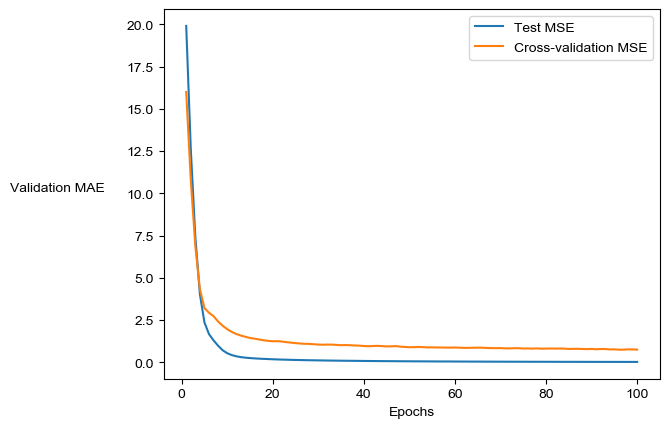

In [15]:
#Observing and verifying MAE to find the optimal epochs
import matplotlib.pyplot as plt

average_train_mse = [
    np.mean([x[i] for x in train_mse_records]) for i in range(num_epochs)
]
average_val_mse = [
    np.mean([x[i] for x in val_mse_records]) for i in range(num_epochs)
]
plt.plot(range(1, len(average_train_mse) + 1), average_train_mse, label='Test MSE')
plt.plot(range(1, len(average_val_mse) + 1), average_val_mse, label='Cross-validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE',rotation=0,labelpad=50)
plt.legend(loc='best')
plt.show()

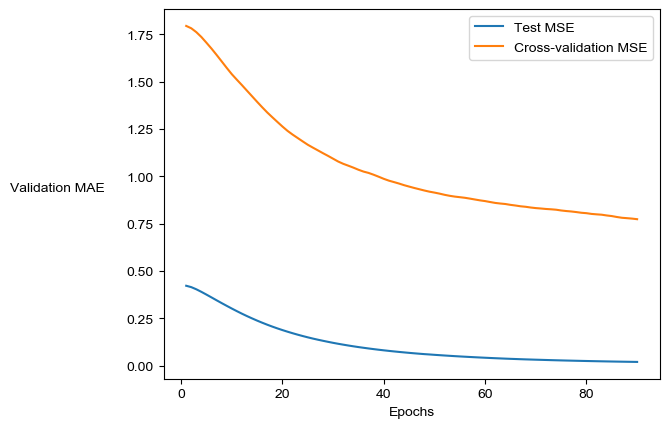

In [16]:
#Smooth processing
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_train_mse = smooth_curve(average_train_mse[10:])
smooth_val_mse = smooth_curve(average_val_mse[10:])
plt.plot(range(1, len(smooth_train_mse) + 1), smooth_train_mse, label='Test MSE')
plt.plot(range(1, len(smooth_val_mse) + 1), smooth_val_mse, label='Cross-validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE', rotation=0,labelpad=50)
plt.legend(loc='best')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split 
max_depths = []
train_results = []
test_results = []

for i in range(2,25):
    max_depths.append(i)

    train_x=X[0:434]
    train_y=y[0:434]
    test_x=X[434:]
    test_y=y[434:]
    model = BP_model()

    history = model.fit(train_x, train_y,epochs=390, batch_size=64, verbose=0)
    test_mse, test_mae = model.evaluate(test_x, test_y)

    model_name = 'BP Network'
    train_pred = model.predict(train_x)
    test_pred =model.predict(test_x)
    from sklearn.metrics import mean_squared_error,r2_score

    mse_train = mean_squared_error(y_true=train_y,y_pred=train_pred)
    r2_train = r2_score(y_true=train_y,y_pred=train_pred)

    mse_test = mean_squared_error(y_true=test_y,y_pred=test_pred)
    r2_test = r2_score(y_true=test_y,y_pred=test_pred)
    
    train_results.append(mse_train)
    test_results.append( mse_test)

3/3 [==============================] - 0s 575us/step


3/3 [==============================] - 0s 566us/step


3/3 [==============================] - 0s 484us/step


3/3 [==============================] - 0s 516us/step


3/3 [==============================] - 0s 532us/step


3/3 [==============================] - 0s 602us/step


3/3 [==============================] - 0s 585us/step


3/3 [==============================] - 0s 588us/step


3/3 [==============================] - 0s 587us/step


3/3 [==============================] - 0s 604us/step


3/3 [==============================] - 0s 590us/step


3/3 [==============================] - 0s 613us/step


3/3 [==============================] - 0s 690us/step


3/3 [==============================] - 0s 598us/step


3/3 [==============================] - 0s 836us/step


3/3 [==============================] - 0s 616us/step


3/3 [==============================] - 0s 532us/step


3/3 [==============================] - 0s 593us/step


3/3 [==============================] - 0s 598us/step


3/3 [==============================] - 0s 524us/step


3/3 [==============================] - 0s 534us/step


3/3 [==============================] - 0s 544us/step


3/3 [==============================] - 0s 556us/step


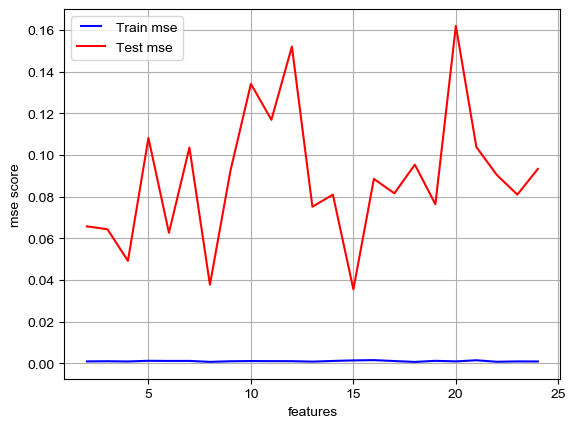

In [18]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train mse')
line2, = plt.plot(max_depths, test_results, 'r', label='Test mse')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('mse score')
plt.xlabel('features')
plt.grid()
plt.show()

In [19]:
model = BP_model()

# X = X[feature_choosed[0:9]]
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25)
history = model.fit(train_x, train_y,epochs=460, batch_size=64, verbose=0)
test_mse, test_mae = model.evaluate(test_x, test_y)

model_name = 'BP Network'
train_pred = model.predict(train_x)
test_pred =model.predict(test_x)
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np  
  
def calculate_mape(y_true, y_pred):  
    
    y_true = np.array(y_true)  
    y_pred = np.array(y_pred)   
    y_true = y_true[y_true != 0]  
    y_pred = y_pred[y_true != 0]  
      
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


mse_train = mean_squared_error(y_true=train_y,y_pred=train_pred)
r2_train = r2_score(y_true=train_y,y_pred=train_pred)
mape_train=mean_absolute_percentage_error(y_true=train_y,y_pred=train_pred)

mse_test = mean_squared_error(y_true=test_y,y_pred=test_pred)
r2_test = r2_score(y_true=test_y,y_pred=test_pred)
mape_test=mean_absolute_percentage_error(y_true=test_y,y_pred=test_pred)

pd.DataFrame({'(MSE)':[mse_train,mse_test],'(R2)':[r2_train, r2_test],'(MAPE)':[mape_train, mape_test]},index=['Train set','Test set'])

5/5 [==============================] - 0s 457us/step


,(MSE),(R2),(MAPE)
Train set,0.000853,0.938256,0.004663
Test set,0.006427,0.635332,0.012859


3/3 [==============================] - 0s 682us/step


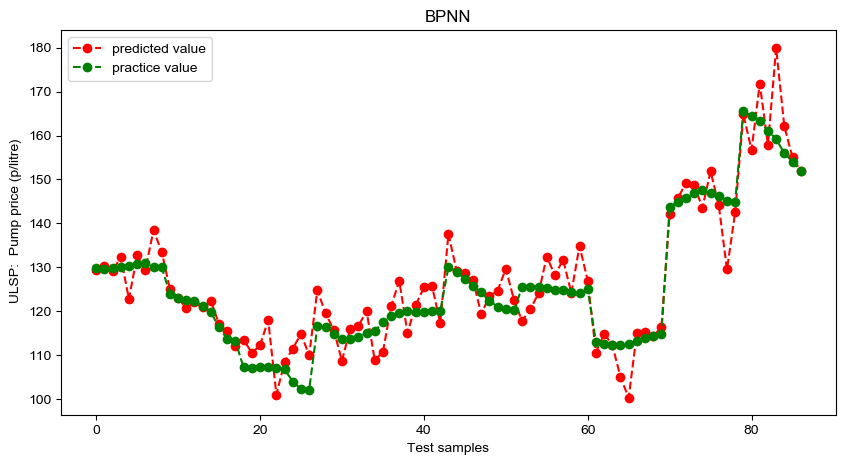

In [20]:
import math
train_x=X[0:434]
train_y=y[0:434]
test_x=X[434:]
test_y=y[434:]
train_y=list(train_y)
test_pred =model.predict(test_x)

for i in range(len(test_y)):
    test_y[i]=math.exp(test_y[i])
    test_pred[i] =math.exp(test_pred[i])
plt.figure(figsize=(10,5))
plt.plot(test_pred,'ro--',label='predicted value')
plt.plot(test_y.values,'go--',label='practice value')
plt.title('BPNN')
plt.xlabel('Test samples')
plt.ylabel(target,rotation=90)
plt.legend()
plt.show()